In [1]:
#loading libraries
library(psych)
library(reshape)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggplot2)
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphic.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myClustering.R")
#source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myBasic.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_kmeans.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/clu_main.R")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/R/dal_main.R")
source("../funcoes_analise_ch.R")

#loading data
dados <-read.csv("event_export_2022-07-20.csv", header = TRUE, sep = ";")
head(dados)
nrow(dados)
ncol(dados)

Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



id,session,type,agent,time,attr1,attr2,attr3
21898,194,plantar,grama,3,252,225,325
21899,194,plantar,grama,5,254,275,327
21900,194,plantar,grama,7,256,325,326
21901,194,desenvolvimento,grama,10,257,225,325
21902,194,plantar,grama,9,258,375,326
21903,194,desenvolvimento,grama,12,259,275,327


[1] 484688

[1] 8

In [2]:
#List of players
players <- read.csv("player_export_2022-07-20.csv", header = TRUE, sep = ";")
head(players)
nrow(players)
ncol(players)

#Avaliation Join Tables
aval_turma_bio <- read.csv("join_tabelas_aval-2022-07-20.csv", header = TRUE, sep = ";")
head(aval_turma_bio)
nrow(aval_turma_bio)
ncol(aval_turma_bio)

#Avaliation Join Tables
aval_turma_info <- read.csv("join_tabelas_aval-2022-06-09.csv", header = TRUE, sep = ";")
head(aval_turma_info)
nrow(aval_turma_info)
ncol(aval_turma_info)


id,name,score,day,month,year,hour,minute,device,expcode
6,teste,255,16,7,2021,20,1,5,
7,teste,90,16,7,2021,20,3,5,
8,,400,22,7,2021,18,28,454,
9,test,765,22,7,2021,18,59,9,
10,Bob,400,6,8,2021,12,10,10,
11,Nicholas,0,11,8,2021,22,7,11,


[1] 539

[1] 10

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
NA,NA,95609edc,4,18,Eletrônica,4AELT,Escola Municipal João XXIII,0,10,...,1,2,4,2,4,1,1,2,1,"Bom, ele pode fazer a rotação de culturas sim, porém quando o arroz for plantado novamente muito provavelmente a praga dos gafanhotos voltará. Ele pode fazer um controle biológico com uma espécie predadora de gafanhotos na plantação de arroz assim não perdendo a plantação e nem fazendo o uso de agrotóxicos."
NA,NA,1c8481c5,3,18,Eletrotécnica,4AEL,Colégio Curso Desafio,4,22,...,4,5,4,4,4,2,2,2,1,"Responderia para ele fazer nenhuma das opções e optar por investir em medidas de controle biológico, já que ampliando a plantação de arroz ou diversificando os cultivos pode servir como fator de ampliação da espécie de gafanhotos."
NA,NA,2c313a49,1,19,Eletrotécnica,4AEL,Colégio Palas,14,21,...,7,1,2,1,5,2,1,2,1,"Plantio alternado, variando a produção"
NA,NA,a7a3a7ce,4,20,Eletrotécnica,4AEL,Escola Municipal Gil Vicente,20,10,...,7,1,3,1,3,2,1,2,1,"Alternar a plantação, assim diminuindo a incidência de gafanhotos e a perda da plantação, porém com atenção à outras espécies invasoras ao redor do novo plantio"
NA,NA,6d519978,1,18,Eletrotécnica,4AELINT,CEFET-RJ/Campus Maracanã,0,6,...,6,2,4,4,4,2,1,1,1,"Uma observação seria analisar corretamente a região, no auxílio de profissionais legalizados, pois conseguiria conservar o território para o determinado cultivo, mesmo que seja possível a presença de um novo cultivo."
NA,NA,95350bff,2,18,Eletrônica,4AELT,pH,5,15,...,2,1,4,3,4,2,1,2,1,outros cultivos


[1] 29

[1] 64

email,name,key,grp,q1,q2,q3,q4,q5,q6,...,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48
NA,NA,0098a532,4,15,informática,1AINFO,CENTRO EDUCACIONAL CALIFORNIA,30,1,...,5,3,3,2,4,2,2,2,1,para você matar os gafanhotos utilize insetos que os gafanhotos são as presa deles e que a plantação são sege o alimentos dela
NA,NA,014644f4,2,15,Informatica,1Ainfo/ Manha,"Prudente de Moraes, Orsina da Fonseca, Cefet",6,10,...,7,1,4,1,2,1,1,1,2,pensaria em expandi ou dividir o terreno para que a diversidade de produtos fosse maior
NA,NA,053f01f8,3,15,informática,1binfo,cefet,5,2,...,7,5,2,5,6,1,1,1,1,"não, ia gastar arroz atoa"
NA,NA,09705fc7,1,17,infotmática,1AINFO,Escola Municipal Governador Carlos Lacerda,7,10,...,7,1,3,1,1,1,2,1,1,para utilizar uma parte da área para plantar outros cultivos
NA,NA,0a3e917c,3,16,Informática,1BINFO,Colégio curso ZeroHum,0,10,...,2,4,5,4,4,2,1,1,2,Acho que investir em outros cultivos seria mais eficiente.
NA,NA,0b594314,4,15,informatica,1AINFO,Pensi,16,14,...,6,2,3,2,4,2,2,2,2,alternar os plantios


[1] 49

[1] 64

In [3]:
grp3_joel<-aval_turma_info %>% filter(grp==3)
#grp3_joel
nrow(grp3_joel)

##### filtrando turma do joel #####
set.seed(123)
grp3_joel<-sample_n(grp3_joel, 7)

aval_turma_info <- rbind(grp3_joel %>% select (key,grp),aval_turma_info %>% filter(grp==1|grp==2|grp==4) %>% select (key,grp))
nrow(aval_turma_info)

[1] 21

[1] 28

In [4]:
aval_participantes <- rbind(aval_turma_bio %>% select (key,grp),aval_turma_info %>% select (key,grp))
#aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())
#aval_participantes <- aval_participantes %>% filter(grp!=0)
#aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())


grp,n
1,14
2,14
3,14
4,15


In [5]:

#### equilibrando os grupos
grp1<-aval_participantes %>% filter(grp==1)
grp2<-aval_participantes %>% filter(grp==2)
grp3<-aval_participantes %>% filter(grp==3)
grp4<-aval_participantes %>% filter(grp==4)

set.seed(123)
grp1<-sample_n(grp1, 14)
grp2<-sample_n(grp2, 14)
grp3<-sample_n(grp3, 14)
grp4<-sample_n(grp4, 14)

aval_participantes <- rbind(grp1,grp2)
aval_participantes <- rbind(aval_participantes,grp3)
aval_participantes <- rbind(aval_participantes,grp4)
aval_participantes
aval_participantes %>% select (grp) %>% group_by(grp) %>% summarise(n = n())


key,grp
facb93c1,1
916a23c3,1
284eaf3c,1
6d519978,1
dad336c3,1
57ded246,1
8d8806d1,1
75e991ed,1
b64109c1,1
2c313a49,1


grp,n
1,14
2,14
3,14
4,14


In [6]:
#aval_sessions_turma_bio <- players %>% filter (expcode %in% aval_turma_bio$key)

####################### filtrando alunos do grupo 2 e 4 ###################
aval_participantes_g2eg4 <- aval_participantes %>% filter (grp %in% c(2,4))
aval_participantes_g2eg4
nrow(aval_participantes_g2eg4)


############# filtrando sessoes de jogo ###################
aval_sessions <- players %>% filter (expcode %in% aval_participantes_g2eg4$key)
head(aval_sessions)
nrow(aval_sessions)
ncol(aval_sessions)

############### última sessão de cada jogador ############
ultimas_sessoes <- aval_sessions %>% select (expcode,id) %>% group_by(expcode) %>% summarise(session = max(id))
ultimas_sessoes
nrow(ultimas_sessoes)
ultimas_sessoes<-ultimas_sessoes$session
ultimas_sessoes


key,grp
fe3b0ae9,2
b5982209,2
2f53b5d0,2
b967a83f,2
f186d1fb,2
fe955bfe,2
014644f4,2
eb6afc4b,2
cfed2631,2
95350bff,2


[1] 28

id,name,score,day,month,year,hour,minute,device,expcode
526,53f94f84,400,1,6,2022,11,21,526,53f94f84
527,b50cfe1f,4195,1,6,2022,11,23,527,b50cfe1f
528,eu,960,1,6,2022,11,26,528,b967a83f
529,edd26b86,9255,1,6,2022,11,29,529,edd26b86
530,Noah,370,1,6,2022,11,32,530,014644f4
531,Noah,70,1,6,2022,11,33,530,014644f4


[1] 60

[1] 10

expcode,session
0098a532,567
014644f4,540
0b594314,559
2f53b5d0,553
41582dea,576
4c234bc9,547
53f94f84,543
635460f1,606
81765813,628
95350bff,631


[1] 28

[1] 567 540 559 553 576 547 543 606 628 631 612 561 600 527 537 538 641 633 578
[20] 579 605 595 614 529 569 563 616 564

In [7]:
dados$id <- NULL #removing the id column

#summary(dados)

#Turning categorical attributes into factors
cols = c("type", "agent")
fac.dados = dados
fac.dados[cols] = lapply(dados[cols], factor)

#Filtering events of actual avaliation sessions
#fac.dados <- fac.dados %>% filter (session %in% todas_sessoes)
fac.dados <- fac.dados %>% filter (session %in% ultimas_sessoes)


#plants
pop.plant = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="plantar"|type=="Predacao"|type=="colher") & (agent=="tomate"|agent=="tomate em desenvolvimento"|agent=="milho"|agent=="milho em desenvolvimento"|agent=="couve"|agent=="couve em desenvolvimento"|agent=="grama"|agent=="grama em desenvolvimento")))
pop.plant = pop.plant[order(pop.plant$session, pop.plant$time),]

#pests  
pop.plague = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Predacao"|type=="Novo inseto") & (agent=="grilo"|agent=="lagarta"|agent=="pulgao"|agent=="cigarrinha")))
pop.plague = pop.plague[order(pop.plague$session, pop.plague$time),]

#predators
pop.predator = fac.dados[c(1,2,3,4)] %>% filter((type=="meta cumprida")|((type=="morte"|type=="Novo inseto"|type=="remover predador") & (agent=="besouro"|agent=="joaninha")))
pop.predator = pop.predator[order(pop.predator$session, pop.predator$time),]

gap = 10


input <- fac.dados %>% filter(type=="meta cumprida") %>% group_by(session,type)
input = input[order(input$session, input$time),]
max_meta_time = 0
actual_session = 0
for(i in 1:nrow(input)){
    session <- input[i,]$session
    if(session != actual_session){
      actual_session <- session
      total_meta = 0
    }
    total_meta = total_meta + 1
    if(total_meta == 8){
        max_meta_time = max(input[i,]$time,max_meta_time)
    }
}
max_meta_time

[1] 700

In [8]:
#creating plant population series
#num_col = floor(max(pop.plant$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.plant <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plant = 0
total_meta = 0
for(i in 1:length(pop.plant$session)){
    session <- pop.plant[i,]$session
    if(session != actual_session){
      line = line + 1
      actual_session <- session
      total_plant = 0
      total_meta = 0
      series.pop.plant[line, 1] <- actual_session
    }
    if(pop.plant[i,]$type == "plantar"){
      total_plant = total_plant + 1
    }
    if(pop.plant[i,]$type == "Predacao" || pop.plant[i,]$type == "colher"){
      total_plant = total_plant - 1
    }
    if(pop.plant[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
    }
    if(total_meta < 8){
        col = floor(pop.plant[i,]$time/gap)+2
        if(total_plant < 0) total_plant = 0
        series.pop.plant[line, col] <- total_plant
    }
}
series.pop.plant <- fill_na(series.pop.plant, nrow(series.pop.plant), pop.plant)
#series.pop.plant

#creating pest population series
#num_col = floor(max(pop.plague$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.plague <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_plague = 0
total_meta = 0
for(i in 1:length(pop.plague$session)){
  session <- pop.plague[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_plague = 0
    total_meta = 0
    series.pop.plague[line, 1] <- actual_session
  }
  if(pop.plague[i,]$type == "Novo inseto"){
    total_plague = total_plague + 1
  }
  if(pop.plague[i,]$type == "Predacao" || pop.plague[i,]$type == "morte"){
    total_plague = total_plague - 1
  }
  if(pop.plague[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
  }
  if(total_meta < 8){
    col = floor(pop.plague[i,]$time/gap)+2
    if(total_plague<0) total_plague = 0
    series.pop.plague[line, col] <- total_plague
  }
}
series.pop.plague <- fill_na(series.pop.plague, nrow(series.pop.plague), pop.plague)

#creating predator population series
#num_col = floor(max(pop.predator$time)/gap) + 2
num_col = floor(max_meta_time/gap) + 1
series.pop.predator <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_predator = 0
total_meta = 0
for(i in 1:length(pop.predator$session)){
  session <- pop.predator[i,]$session
  if(session != actual_session){
    line = line + 1
    actual_session <- session
    total_predator = 0
    total_meta = 0
    series.pop.predator[line, 1] <- actual_session
  }
  if(pop.predator[i,]$type == "Novo inseto"){
    total_predator = total_predator + 1
  }
  if(pop.predator[i,]$type == "morte" || pop.predator[i,]$type == "remover predador"){
    total_predator = total_predator - 1
  }
    if(pop.predator[i,]$type == "meta cumprida"){
      total_meta = total_meta + 1
    }
    if(total_meta < 8){
      col = floor(pop.predator[i,]$time/gap)+2
      if(total_predator < 0) total_predator = 0
      series.pop.predator[line, col] <- total_predator
    }
}
series.pop.predator <- fill_na(series.pop.predator, nrow(series.pop.predator), pop.predator)

[1] 71

var,n
1,8
2,6
3,13


TableGrob (3 x 1) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]
3 3 (3-3,1-1) arrange gtable[layout]

session,k
527,3
529,2
537,2
538,2
540,3
543,3
547,3
559,1
561,3
563,1


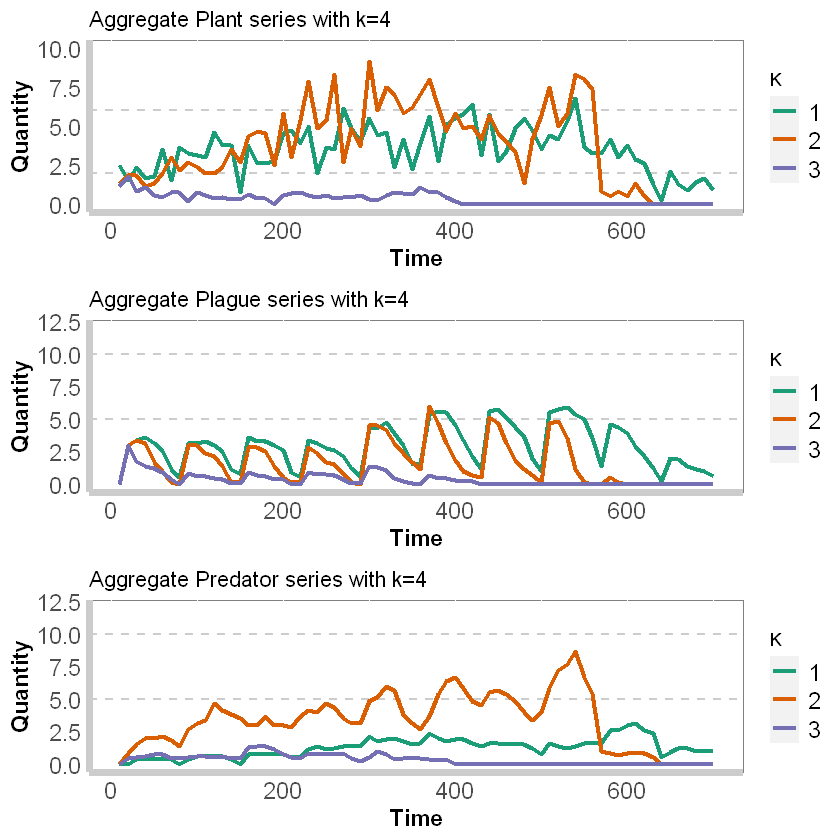

In [9]:
###############################
### Realizando a clusterizaçao
###############################

num_col <- min(ncol(series.pop.plant),ncol(series.pop.plant),ncol(series.pop.predator))  ##TOTAL DE COLUNAS
num_col
#data_serie <- return_cluster_comb(series.pop.plant, series.pop.plague, series.pop.predator, todas_sessoes, 4, num_col)
data_serie <- return_cluster_comb(series.pop.plant, series.pop.plague, series.pop.predator, ultimas_sessoes, 4, num_col)


###Winsorizing the series to remove outliers 2%
wseries.pop.plant <- series.pop.plant
wseries.pop.plant[,2:length(wseries.pop.plant)] <- psych::winsor(wseries.pop.plant[,2:length(wseries.pop.plant)], trim = 0.02)

wseries.pop.plague <- series.pop.plague
wseries.pop.plague[,2:length(wseries.pop.plague)] <- psych::winsor(wseries.pop.plague[,2:length(wseries.pop.plague)], trim = 0.02)

wseries.pop.predator <- series.pop.predator
wseries.pop.predator[,2:length(wseries.pop.predator)] <- psych::winsor(wseries.pop.predator[,2:length(wseries.pop.predator)], trim = 0.02)

#####APPLYING Z-SCORE
zscore_plant = wseries.pop.plant
zscore_plant[,2:length(zscore_plant)] = scale(zscore_plant[,2:length(zscore_plant)])
zscore_plant[is.na(zscore_plant)] <- 0

zscore_plague = wseries.pop.plague
zscore_plague[,2:length(zscore_plague)] = scale(zscore_plague[,2:length(zscore_plague)])
zscore_plague[is.na(zscore_plague)] <- 0

zscore_predator = wseries.pop.predator
zscore_predator[,2:length(zscore_predator)] = scale(zscore_predator[,2:length(zscore_predator)])
zscore_predator[is.na(zscore_predator)] <- 0


set.seed(222)

#####CLUSTERING WITH K=4
#zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, todas_sessoes, 4, num_col)
#zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, ultimas_sessoes, 4, num_col)

#####CLUSTERING WITH K=3
#zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, todas_sessoes, 4, num_col)
zdata_serie <- return_cluster_comb(zscore_plant, zscore_plague, zscore_predator, ultimas_sessoes, 3, num_col)


count(zdata_serie, var = k)
data_serie$k <- zdata_serie$k
line_cluster_sep(data_serie, 10, num_col, "Aggregate Plant series with k=4", "Aggregate Plague series with k=4", "Aggregate Predator series with k=4",0,10,0,12,0,12)
data_serie %>% select(session, k)

k_classification <- zdata_serie$k

#exportando dados rData
save(data_serie, file="data_serie_classified_todas_turmas_2022.RData")


In [10]:
#aval_session_info_eait <-read.csv2("session_data.csv", header = TRUE, sep = ";")
#colnames(aval_session_info_eait)[c(1,3,5)]<-c("expcode","id","score")
#nrow(aval_session_info_eait)
#nrow(aval_sessions_2022)
#aval_sessions<-rbind(aval_sessions_2022 %>% select (id,score,expcode),aval_session_info_eait %>% select (id,score,expcode))

#aval_sessions<-aval_sessions_2022 %>% select (id,score,expcode)
aval_sessions<-aval_sessions %>% select (id,score,expcode)
aval_sessions
nrow(aval_sessions)


id,score,expcode
526,400,53f94f84
527,4195,b50cfe1f
528,960,b967a83f
529,9255,edd26b86
530,370,014644f4
531,70,014644f4
532,400,b967a83f
534,135,b5982209
537,15915,b5982209
538,3985,b967a83f


[1] 60

In [11]:
### Gerando dataset das estatisticas de jogo

#filtrando eventos dentro das 8 metas e contabilizando
eventos <- fac.dados[c(1,2,3,4)] %>% filter(time < max_meta_time)
event.quantity.data <- eventos %>% group_by(session,type) %>% summarise(n = n())
time_by_session <- fac.dados %>% select(session,time) %>% group_by(session) %>% summarise(across(everything(), list(max)))

#geranto dataset com sessoes classificadas e pontuacoes
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, score)
game.data <- merge(x,y,by.x="session",by.y="id")

# adicionando coluna tempo
game.data <- merge(game.data,time_by_session,by.x="session",by.y="session")
max_meta_time
#game.data[game.data$time_1 > max_meta_time,]$time_1 <- max_meta_time
colnames(game.data)[ncol(game.data)] <- "time"

#adicionando predadores inseridos
pred <- event.quantity.data %>% filter(type=="inserir predador")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Predadores"

#adicionando predadores inseridos
pred <- event.quantity.data %>% filter(type=="multa")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Multas"

#adicionando metas lançadas
pred <- event.quantity.data %>% filter(type=="meta lancada")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Meta_lancada"

#adicionando metas cumpridas
pred <- event.quantity.data %>% filter(type=="meta cumprida")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
#game.data[game.data$n > 8,]$n <- 8
colnames(game.data)[ncol(game.data)] <- "Meta_cumprida"

#adicionando Pontuacao / tempo
game.data$pontXtempo <- game.data$score / game.data$time

#adicionando plantas plantadas
pred <- event.quantity.data %>% filter(type=="plantar")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Plantacoes"

#adicionando Plantas colhidas
pred <- event.quantity.data %>% filter(type=="colher")
pred <- pred %>% select(session, n)
game.data <- merge(game.data, pred, by.x="session", by.y="session", all.x=TRUE) 
game.data[is.na(game.data)] <- 0
colnames(game.data)[ncol(game.data)] <- "Colhidas"

#adicionando % planta colhida
game.data$percentColhida <- game.data$Colhidas / game.data$Plantacoes

#adicionando % meta cumprida
game.data$percentMetaCumprida <- game.data$Meta_cumprida / game.data$Meta_lancada

game.data[is.na(game.data)] <- 0
game.data
nrow(game.data)

`summarise()` has grouped output by 'session'. You can override using the `.groups` argument.


[1] 700

session,k,score,time,Predadores,Multas,Meta_lancada,Meta_cumprida,pontXtempo,Plantacoes,Colhidas,percentColhida,percentMetaCumprida
527,3,4195,422,8,0,6,6,9.9407583,47,40,0.8510638,1.0000000
529,2,9255,561,31,3,8,8,16.4973262,124,110,0.8870968,1.0000000
537,2,15915,560,43,6,8,8,28.4196429,198,189,0.9545455,1.0000000
538,2,3985,560,22,0,8,8,7.1160714,73,57,0.7808219,1.0000000
540,3,1375,399,16,0,6,4,3.4461153,36,33,0.9166667,0.6666667
543,3,565,73,1,0,1,1,7.7397260,16,8,0.5000000,1.0000000
547,3,400,20,0,0,1,0,20.0000000,0,0,0.0000000,0.0000000
559,1,21165,560,0,0,8,8,37.7946429,199,178,0.8944724,1.0000000
561,3,100,16,0,0,1,0,6.2500000,2,0,0.0000000,0.0000000
563,1,7615,630,13,0,9,8,12.0873016,124,94,0.7580645,0.8888889


[1] 27

In [12]:
#analisando dados de jogo por agrupamento
#game.data %>% select(k, score, time, Predadores, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

game.data %>% select(k, score, time, Predadores, Multas, Meta_lancada, Meta_cumprida, pontXtempo, Plantacoes, Colhidas, percentColhida, percentMetaCumprida) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean), .names = "{.fn}.{.col}"))

k,mean.score,mean.time,mean.Predadores,mean.Multas,mean.Meta_lancada,mean.Meta_cumprida,mean.pontXtempo,mean.Plantacoes,mean.Colhidas,mean.percentColhida,mean.percentMetaCumprida
1,12135.0000,647.5000,12.125000,0.250000,9.250000,7.625000,18.85627,161.00000,130.00000,0.7811841,0.8319444
2,8285.0000,571.8333,35.500000,3.333333,8.166667,8.000000,14.27584,149.50000,126.66667,0.8450035,0.9814815
3,834.2308,142.5385,5.307692,0.000000,2.461538,1.538462,8.85016,16.23077,12.84615,0.4915380,0.4051282


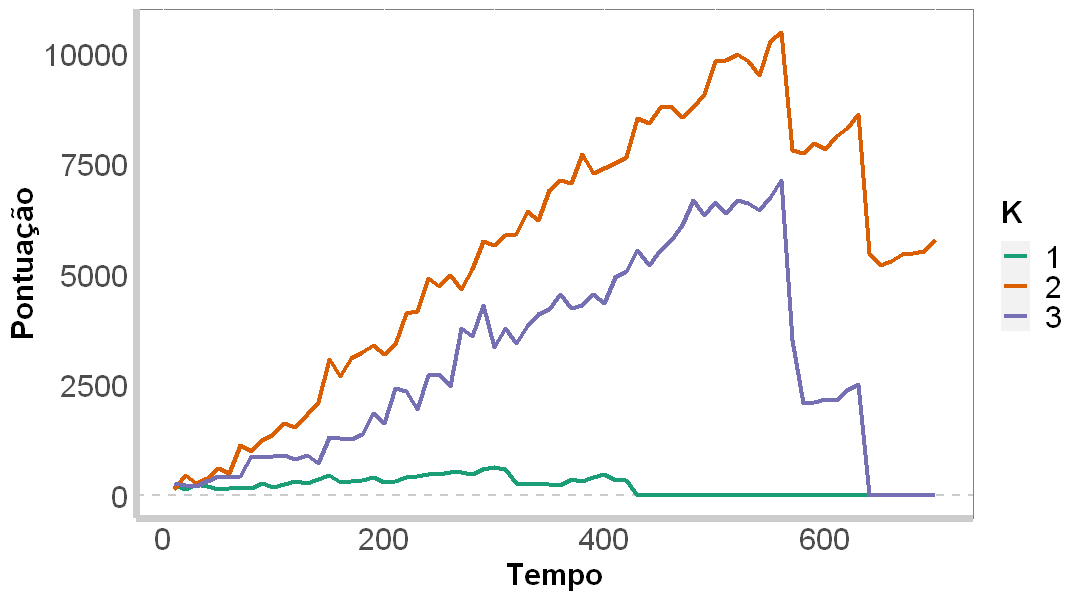

In [24]:
###########################
### Serie de pontuação ####
###########################

#filtrando eventos que alteram a pontuação
score_curve = fac.dados[c(1,2,3,4,7)] %>% filter(type=="meta cumprida"|type=="plantar"|type=="colher"|type=="remover predador"|type=="inserir predador"|type=="meta nao cumprida"|type=="multa")
score_curve = score_curve[order(score_curve$session, score_curve$time),]
#score_curve


#creating score curve series
num_col = floor(max_meta_time/gap) + 1
series.score_curve <- create_dataframe(num_col, gap)
actual_session = 0
line = 0
total_score = 400
total_meta = 0
for(i in 1:length(score_curve$session)){
    session <- score_curve[i,]$session
    if(session != actual_session){
      line = line + 1
      actual_session <- session
      total_score = 400
      total_meta = 0
      series.score_curve[line, 1] <- actual_session
    }
    
    if(score_curve[i,]$type == "plantar"){
        if(score_curve[i,]$agent == "couve"){
            total_score = total_score - 120
        }
        if(score_curve[i,]$agent == "milho"){
            total_score = total_score - 125
        }
        if(score_curve[i,]$agent == "tomate"){
            total_score = total_score - 150
        }
        if(score_curve[i,]$agent == "grama"){
            total_score = total_score -75
        }
    }
    
    if(score_curve[i,]$type == "colher"){
        if(score_curve[i,]$agent == "couve"){
            total_score = total_score + 230
        }
        if(score_curve[i,]$agent == "milho"){
            total_score = total_score + 240
        }
        if(score_curve[i,]$agent == "tomate"){
            total_score = total_score + 290
        }
        if(score_curve[i,]$agent == "grama"){
            total_score = total_score + 140
        }
    }
   
    if(score_curve[i,]$type == "remover predador"){
        total_score = total_score - 80
    }
    if(score_curve[i,]$type == "inserir predador"){
        total_score = total_score - 150
    }
   
    if(score_curve[i,]$type == "meta cumprida"){
        total_score = total_score + 300
        total_meta = total_meta + 1

    }
    if(score_curve[i,]$type == "meta nao cumprida"){
        total_score = total_score - 300
    }
    
    if(score_curve[i,]$type == "multa"){
        total_score = total_score - score_curve[i,]$attr3
    }
    
    if(total_meta < 8){
        col = floor(score_curve[i,]$time/gap)+2
        if(total_score < 0) total_score = 0
        series.score_curve[line, col] <- total_score
    }
}
series.score_curve <- fill_na_score(series.score_curve, nrow(series.score_curve), score_curve)
#series.score_curve

#### Adicionando classificação #######
class<-data_serie %>% select(session, k)
series.score_curve <- merge(series.score_curve, class, by.x="session",by.y="session")
#series.score_curve

#### Gerando plot das curvas #########

gap = 10
cols = num_col
title = "Curvas de pontuação agregadas por k=4"
linf = 0
linsup = 0

#calculating the averages
mean.series.score_curve <- as.data.frame(series.score_curve[,2:ncol(series.score_curve)] %>% group_by(k)%>% summarise(across(everything(), list(mean))))

#end x axis
end_x <- (cols-1)*10

#data plot
data_plot <- melt(mean.series.score_curve, id.vars = c(1))
data_plot <- data_plot[order(data_plot$k, data_plot$variable),]
#creating x axis
data_plot$x <- seq(from = 10, to = end_x, by = gap)
data_plot$k <- factor(data_plot$k, levels = c("3", "1", "2")) # reordenando os k do pio para o melhor


#exportando dados rData
save(data_plot, file="data_plot_pontuacao_todas_turmas_2022.RData")

options(repr.plot.width =9, repr.plot.height =5)
#plot
ggplot(data_plot, aes(x=x, y=value, group=k)) +
    geom_hline(yintercept =  2, linetype="dashed", color = "grey80", size=.7) + 
    geom_hline(yintercept =  6, linetype="dashed", color = "grey80", size=.7) +
    scale_color_brewer(palette="Dark2",labels = c("1","2","3"))+
    geom_line(aes(color=as.factor(k)), size = 1.25) +
    #ggtitle(title1)
    #labs(title=title1,x ="Time", y = "Quantity", color = "K")+
    labs(x ="Tempo", y = "Pontuação", color = "K")+
    #scale_y_continuous(limits = c(linf, lsup))+#, breaks = c(15,30), labels = c("20", "40")) +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
        axis.line = element_line(size = 2, colour = "grey80"),
        axis.ticks.x=element_blank(),
        axis.ticks.y=element_blank(),
        axis.text=element_text(size=18),
        axis.title=element_text(size=18,face="bold"),
        legend.title=element_text(size=18,face="bold"),
        legend.text = element_text(size=18))
        #legend.position = "bottom")


In [14]:
#### Series classificadas

data_serie$k <- k_classification
x<-data_serie %>% select(session, k)
y<-aval_sessions %>% select(id, expcode)
classified_sessions <- merge(x,y,by.x="session",by.y="id")
#classified_sessions


In [15]:
###########################################################################
####
####  ANALISANDO UEQ
####
###########################################################################

#importing UEQ Result
ueq_data <-read.csv2("resumo_UEQ _todas_turmas.csv", header = TRUE, sep = ";")
ueq_classified <- merge(classified_sessions, ueq_data, by.x="expcode", by.y="KEY")

#análise por agrupamento
ueq_classified %>% select(k, Atractividade, Transparência, Eficiência, Controlo, Estimulação, Inovação) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

#análise gearal
ueq_data %>% select(Atractividade, Transparência, Eficiência, Controlo, Estimulação, Inovação) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))


k,mean.Atractividade,sd.Atractividade,mean.Transparência,sd.Transparência,mean.Eficiência,sd.Eficiência,mean.Controlo,sd.Controlo,mean.Estimulação,sd.Estimulação,mean.Inovação,sd.Inovação
1,2.291250,0.6283411,2.343750,0.5334775,2.062500,1.0669549,1.218750,0.6605936,2.1250000,0.9258201,1.3750000,1.517752
2,2.166667,0.8305340,2.416667,0.6454972,1.833333,1.0206207,1.625000,0.2091650,1.8750000,1.0093315,0.9166667,1.169045
3,1.781538,0.6795077,1.538462,0.9233440,1.750000,0.9071475,1.269231,0.4943592,0.9615385,1.2026280,0.4615385,1.050031


mean.Atractividade,sd.Atractividade,mean.Transparência,sd.Transparência,mean.Eficiência,sd.Eficiência,mean.Controlo,sd.Controlo,mean.Estimulação,sd.Estimulação,mean.Inovação,sd.Inovação
1.491039,1.228142,1.376623,1.341778,1.392857,1.223017,1.11039,1.009408,1.162338,1.384694,0.6266234,1.361249


In [16]:
###########################################################################
####
####  ANALISANDO DESEMPENHO TEORICO
####
###########################################################################


desempenho_teorico <- read.csv("avaliacao_teorica_turma_joel_myrna_leo.csv", header = TRUE, sep = ";")
desempenho_teorico[is.na(desempenho_teorico)] <- 0
desempenho_teorico <- desempenho_teorico %>% filter(grp==1|grp==2|grp==3|grp==4)
desempenho_teorico <- desempenho_teorico %>% filter(id %in% aval_participantes$key)


desempenho_teorico_e_ueq <- merge(desempenho_teorico, ueq_data[,c(1,3:8)], by.x="id", by.y="KEY")
#desempenho_teorico_e_ueq

#classified_sessions

desempenho_teorico_e_jogo <- merge(desempenho_teorico,classified_sessions,by.x="id",by.y="expcode")
desempenho_teorico_e_jogo <- desempenho_teorico_e_jogo %>% filter(session %in% aval_sessions$id)
desempenho_teorico_e_jogo

nrow(desempenho_teorico)
nrow(desempenho_teorico_e_ueq)


#exportando dados rData
save(desempenho_teorico_e_jogo, file="desempenho_teorico_e_jogo_todas_turmas_2022.RData")

#exportando dados rData
save(desempenho_teorico, file="desempenho_teorico_todas_turmas_2022.RData")

id,grp,idade,horas.de.jogo,horas.de.estudo,conhecimento.previo,ex_fixacao_q1,ex_fixacao_q2,ex_fixacao_q3,ex_fixacao_q4,...,form_desempenho_cadeia_alimentar_lagarta,form_teoria_especies_p_manejo,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4,form_teoria_cbXagrotóxicos,form_teoria_rotacao_de_cultivos,session,k
0098a532,4,15,30,1,A,0,0,0,0,...,1.00,0.75,1,0,0,1,0.0,C,567,3
014644f4,2,15,6,10,A,0,0,0,0,...,0.00,0.00,0,1,1,0,0.0,B,540,3
0b594314,4,15,16,14,A,0,0,0,0,...,1.00,0.75,1,0,0,0,0.5,B,559,1
41582dea,4,18,0,8,A,0,0,0,0,...,0.00,0.75,1,1,1,1,1.0,B,576,1
4c234bc9,2,16,1,11,B,0,0,0,0,...,0.00,1.00,1,1,1,0,0.0,A,547,3
53f94f84,4,15,7,9,D,0,0,0,0,...,0.00,0.75,1,0,1,1,1.0,A,543,3
635460f1,4,18,8,8,A,0,0,0,0,...,0.00,0.75,1,1,1,1,1.0,B,606,1
81765813,4,19,0,5,A,0,0,0,0,...,0.00,0.00,0,0,0,0,0.0,0,628,3
95350bff,2,18,5,15,D,0,0,0,0,...,0.00,0.50,1,1,0,1,1.0,B,631,2
95609edc,4,18,0,10,AC,0,0,0,0,...,1.00,0.75,0,1,0,1,1.0,B,612,3


[1] 56

[1] 55

Group,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.4464286,0.3692322,0.5357143,0.3078640,14
2,0.4642857,0.3904773,0.2857143,0.4258153,14
3,0.5357143,0.3231031,0.6071429,0.4462912,14
4,0.4821429,0.3856100,0.5000000,0.4803845,14


Group,Question,value,sd,n
1,TQ1,0.4464286,0.3692322,14
2,TQ1,0.4642857,0.3904773,14
3,TQ1,0.5357143,0.3231031,14
4,TQ1,0.4821429,0.3856100,14
1,TQ2,0.5357143,0.3078640,14
2,TQ2,0.2857143,0.4258153,14
3,TQ2,0.6071429,0.4462912,14
4,TQ2,0.5000000,0.4803845,14


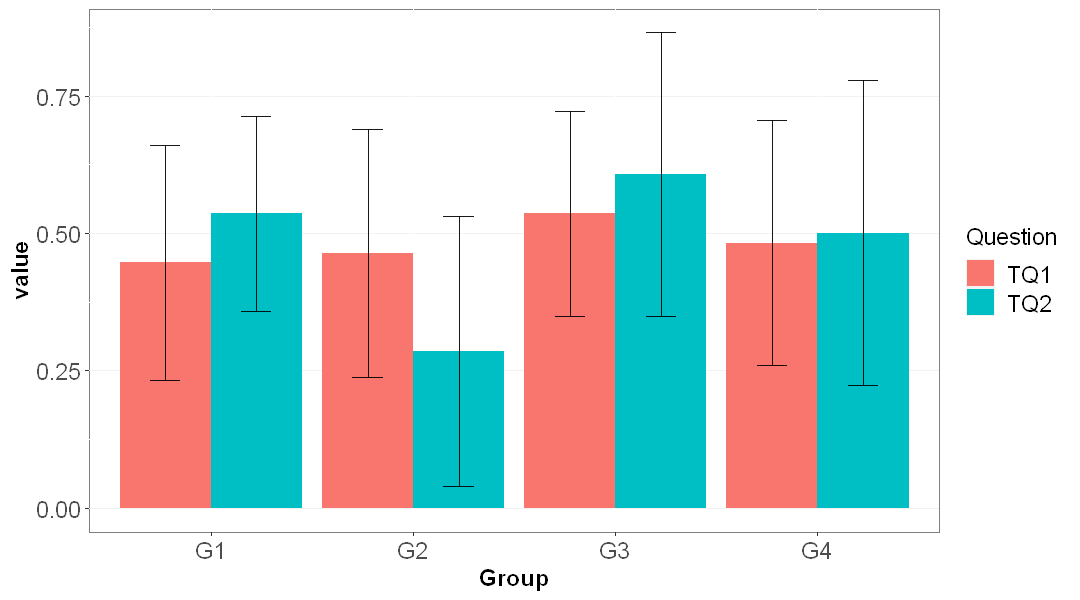

In [17]:
######################
### Questoes 10 e 11
######################


#### Analise por grupo ######

group_data <- desempenho_teorico %>% select (grp,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(group_data, var = grp)
group_data <- group_data %>% group_by(grp) %>% summarise(across(everything(), list(mean,sd)))
group_data$n <- n$n
colnames(group_data) <- c("Group", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
group_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
group_data_melt <- melt(as.data.frame(group_data[,c('Group', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

group_data_melt$sd <- group_data$Q10_sd
group_data_melt[5:8,4] <- group_data$Q11_sd
group_data_melt$n <- group_data$n
colnames(group_data_melt)[2] <- "Question"
group_data_melt

#Calculando o intervalo de confianca
alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)

#exportando dados rData
#save(group_data, file="group_data_todas_turmas_2022.RData")

ggplot(group_data_melt, aes(fill=Question, y=value, x=Group)) + 
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("G1", "G2", "G3", "G4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

K,TQ1,Q10_sd,TQ2,Q11_sd,n
1,0.6250000,0.2672612,0.5000000,0.4629100,8
2,0.2083333,0.3322900,0.3333333,0.5163978,6
3,0.5384615,0.4062808,0.3461538,0.4736655,13


K,Question,value,sd,n
1,TQ1,0.6250000,0.2672612,8
2,TQ1,0.2083333,0.3322900,6
3,TQ1,0.5384615,0.4062808,13
1,TQ2,0.5000000,0.4629100,8
2,TQ2,0.3333333,0.5163978,6
3,TQ2,0.3461538,0.4736655,13


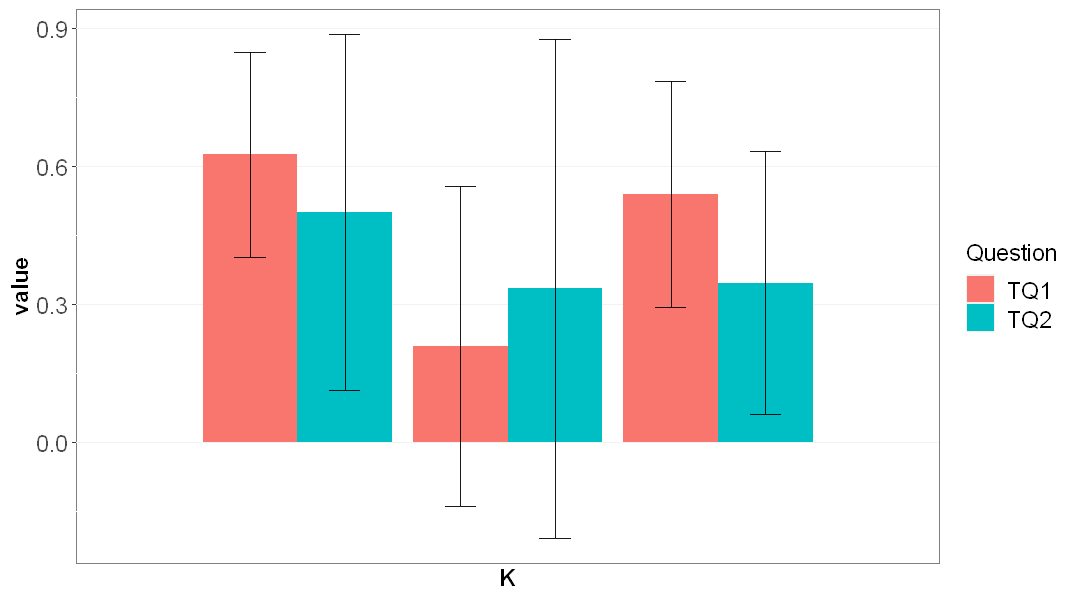

In [18]:
#### Analise por perfil de jogo ######

k_data <- desempenho_teorico_e_jogo %>% select (k,form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos)
n <- count(k_data, var = k)
k_data <- k_data %>% group_by(k) %>% summarise(across(everything(), list(mean,sd)))
k_data$n <- n$n
colnames(k_data) <- c("K", "TQ1", "Q10_sd", "TQ2", "Q11_sd", "n")
k_data

#melt(as.data.frame(group_data), id.vars = "Group", measure.vars = c("Q10_mean", "Q11_mean"))
#group_data_melt <- melt(as.data.frame(group_data), id=c("Group"))
k_data_melt <- melt(as.data.frame(k_data[,c('K', 'TQ1', 'TQ2')]), id.vars = c(1))
#group_data_melt

k_data_melt$sd <- k_data$Q10_sd
#k_data_melt[5:8,4] <- k_data$Q11_sd ### para k=4
k_data_melt[4:6,4] <- k_data$Q11_sd  ### para k=3
k_data_melt$n <- k_data$n
colnames(k_data_melt)[2] <- "Question"
k_data_melt

#Calculando o intervalo de confianca
alpha=0.05
#t <- qt((1-alpha)/2 + .5, n-1)

ggplot(k_data_melt, aes(fill=Question, y=value, x=K)) + 
    geom_bar(position="dodge", stat="identity") +
    #scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    scale_x_discrete(labels = c("K1", "K2", "K3")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
  

grp,mean.idade,sd.idade,mean.horas.de.jogo,sd.horas.de.jogo,mean.horas.de.estudo,sd.horas.de.estudo
1,17.07143,1.685426,5.928571,8.315549,7.714286,7.528700
2,17.00000,1.797434,6.357143,10.195075,7.928571,5.165928
3,16.78571,1.368805,8.428571,9.748485,10.357143,10.073630
4,16.92857,1.817195,8.714286,8.809336,9.571429,7.186679


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


grp,conhecimento.previo,n
1,A,8
1,B,1
1,D,5
2,A,6
2,AC,2
2,B,2
2,C,1
2,D,3
3,A,5
3,AC,1


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


k,mean.idade,sd.idade,mean.horas.de.jogo,sd.horas.de.jogo,mean.horas.de.estudo,sd.horas.de.estudo
1,17.62500,1.685018,5.375000,5.629958,6.625000,3.852179
2,17.33333,1.632993,13.666667,15.055453,12.666667,10.073066
3,16.61538,1.757767,6.076923,7.921085,7.923077,4.751518


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


k,conhecimento.previo,n
1,A,5
1,AC,2
1,C,1
2,A,3
2,B,1
2,D,2
3,A,7
3,AC,2
3,B,1
3,D,3


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


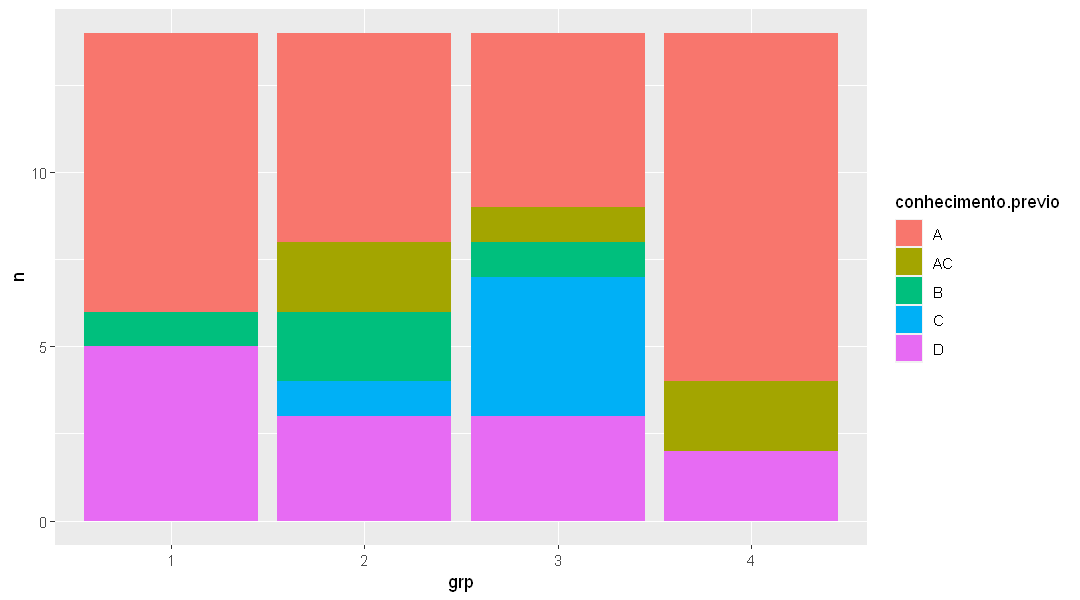

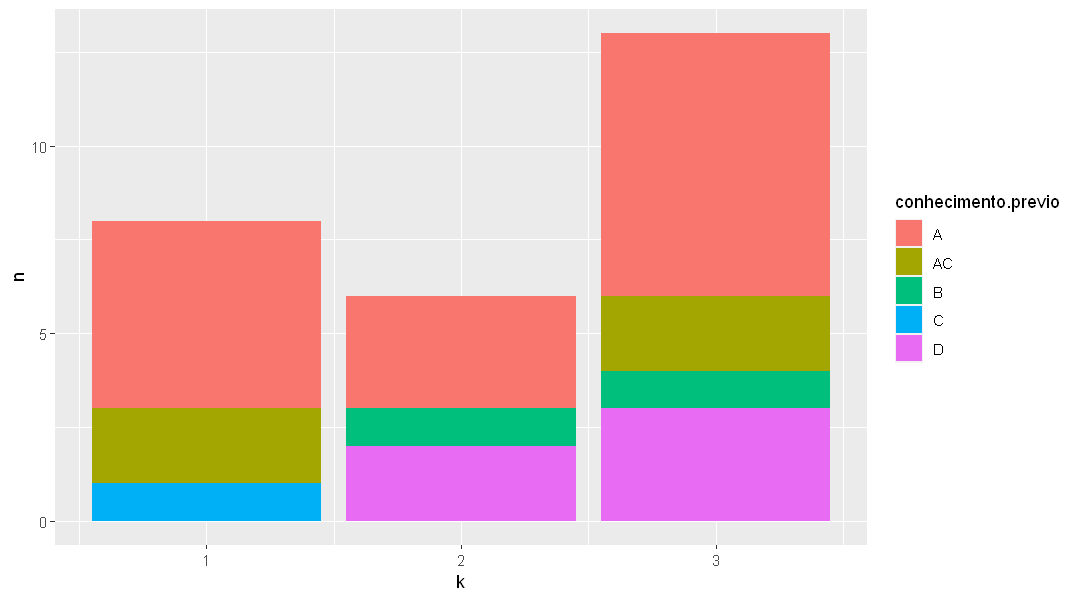

In [19]:
#########################################
####                                #####
####    PERFIL Dos Participantes    #####
####                                #####
#########################################


#### PERFIL POR GRUPO DA AVALIACAO
desempenho_teorico %>% select(grp,idade,horas.de.jogo,horas.de.estudo) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
resultado <- desempenho_teorico %>% select(grp, conhecimento.previo) %>% group_by(grp,conhecimento.previo) %>% summarise(n = n())
ggplot(resultado, aes(x = grp, y = n, fill = conhecimento.previo)) + 
  geom_bar(stat = "identity")

#### PERFIL POR CLASSIFICACAO DO DESEMPENHO
desempenho_teorico_e_jogo %>% select(k,idade,horas.de.jogo,horas.de.estudo) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
desempenho_teorico_e_jogo %>% select(k, conhecimento.previo) %>% group_by(k,conhecimento.previo) %>% summarise(n = n())
resultado<-desempenho_teorico_e_jogo %>% select(k, conhecimento.previo) %>% group_by(k,conhecimento.previo) %>% summarise(n = n())
ggplot(resultado, aes(x = k, y = n, fill = conhecimento.previo)) + 
  geom_bar(stat = "identity")


`summarise()` has grouped output by 'grp'. You can override using the `.groups` argument.


grp,form_teoria_rotacao_de_cultivos,n
1,B,7
1,C,7
2,0,1
2,A,1
2,B,9
2,C,3
3,A,1
3,B,7
3,C,6
4,0,1


`summarise()` has grouped output by 'k'. You can override using the `.groups` argument.


k,form_teoria_rotacao_de_cultivos,n
1,B,6
1,C,2
2,B,5
2,C,1
3,0,2
3,A,2
3,B,5
3,C,4


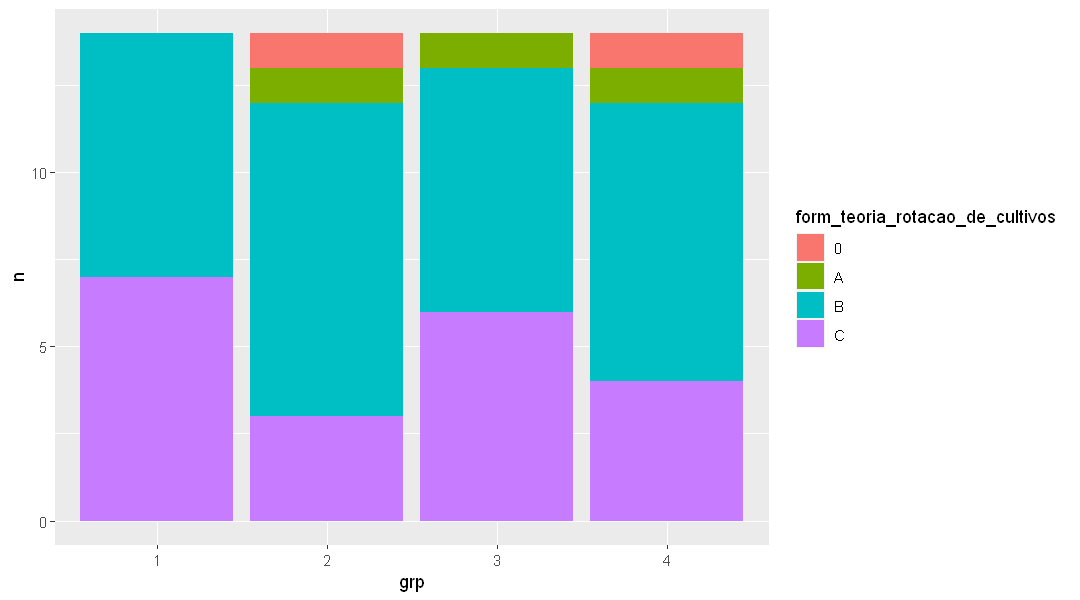

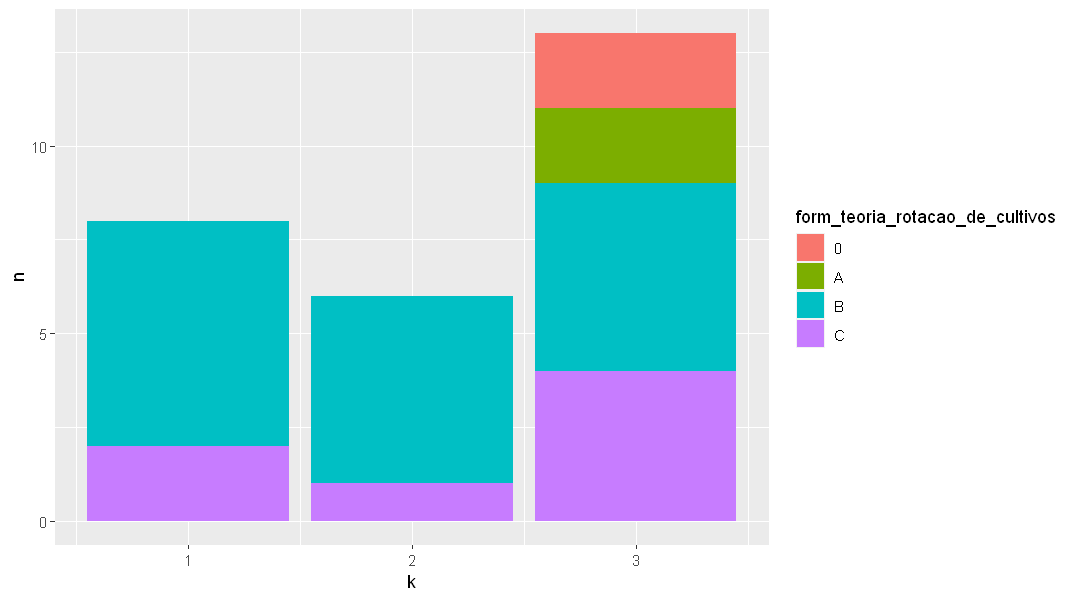

In [20]:
##############################################################
####                                                     #####
####    DESEMPENHO QUESTAO teoria_rotacao_de_cultivos    #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_rotacao_de_cultivos POR GRUPO
resposta_grupo <-desempenho_teorico %>% select(grp, form_teoria_rotacao_de_cultivos) %>% group_by(grp,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
resposta_grupo

#### DESEMPENHO QUESTAO teoria_rotacao_de_cultivos POR CLASSIFICAÇÃO
resposta_perfil <- desempenho_teorico_e_jogo %>% select(k, form_teoria_rotacao_de_cultivos) %>% group_by(k,form_teoria_rotacao_de_cultivos) %>% summarise(n = n())
resposta_perfil

#Pergunta sobre a rotação de cultivos
#(i) plantar mais arroz             A
#(ii) sugerir plantios alternados.  B
#(ii) Outra resposta.               C
# 0 -> não respondeu

ggplot(resposta_grupo, aes(x = grp, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
  geom_bar(stat = "identity")

ggplot(resposta_perfil, aes(x = k, y = n, fill = form_teoria_rotacao_de_cultivos)) + 
  geom_bar(stat = "identity")

grp,mean.form_teoria_caracteristica_desejada_q1,sd.form_teoria_caracteristica_desejada_q1,mean.form_teoria_caracteristica_desejada_q2,sd.form_teoria_caracteristica_desejada_q2,mean.form_teoria_caracteristica_desejada_q3,sd.form_teoria_caracteristica_desejada_q3,mean.form_teoria_caracteristica_desejada_q4,sd.form_teoria_caracteristica_desejada_q4
1,0.7142857,0.4688072,0.8571429,0.3631365,0.6428571,0.4972452,0.7142857,0.4688072
2,0.6428571,0.4972452,0.6428571,0.4972452,0.6428571,0.4972452,0.5714286,0.5135526
3,0.7142857,0.4688072,0.5000000,0.5188745,0.7142857,0.4688072,0.7142857,0.4688072
4,0.6428571,0.4972452,0.4285714,0.5135526,0.5000000,0.5188745,0.6428571,0.4972452


grp,variable,value,sd,n
1,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
2,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q1,0.7142857,0.4688072,14
4,mean.form_teoria_caracteristica_desejada_q1,0.6428571,0.4972452,14
1,mean.form_teoria_caracteristica_desejada_q2,0.8571429,0.3631365,14
2,mean.form_teoria_caracteristica_desejada_q2,0.6428571,0.4972452,14
3,mean.form_teoria_caracteristica_desejada_q2,0.5000000,0.5188745,14
4,mean.form_teoria_caracteristica_desejada_q2,0.4285714,0.5135526,14
1,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14
2,mean.form_teoria_caracteristica_desejada_q3,0.6428571,0.4972452,14


k,mean.form_teoria_caracteristica_desejada_q1,sd.form_teoria_caracteristica_desejada_q1,mean.form_teoria_caracteristica_desejada_q2,sd.form_teoria_caracteristica_desejada_q2,mean.form_teoria_caracteristica_desejada_q3,sd.form_teoria_caracteristica_desejada_q3,mean.form_teoria_caracteristica_desejada_q4,sd.form_teoria_caracteristica_desejada_q4
1,0.8750000,0.3535534,0.6250000,0.5175492,0.7500000,0.4629100,0.7500000,0.4629100
2,0.8333333,0.4082483,0.6666667,0.5163978,0.3333333,0.5163978,0.5000000,0.5477226
3,0.4615385,0.5188745,0.4615385,0.5188745,0.6153846,0.5063697,0.5384615,0.5188745


k,variable,value,sd,n
1,mean.form_teoria_caracteristica_desejada_q1,0.8750000,0.3535534,8
2,mean.form_teoria_caracteristica_desejada_q1,0.8333333,0.4082483,6
3,mean.form_teoria_caracteristica_desejada_q1,0.4615385,0.5188745,13
1,mean.form_teoria_caracteristica_desejada_q2,0.6250000,0.5175492,8
2,mean.form_teoria_caracteristica_desejada_q2,0.6666667,0.5163978,6
3,mean.form_teoria_caracteristica_desejada_q2,0.4615385,0.5188745,13
1,mean.form_teoria_caracteristica_desejada_q3,0.7500000,0.4629100,8
2,mean.form_teoria_caracteristica_desejada_q3,0.3333333,0.5163978,6
3,mean.form_teoria_caracteristica_desejada_q3,0.6153846,0.5063697,13
1,mean.form_teoria_caracteristica_desejada_q4,0.7500000,0.4629100,8


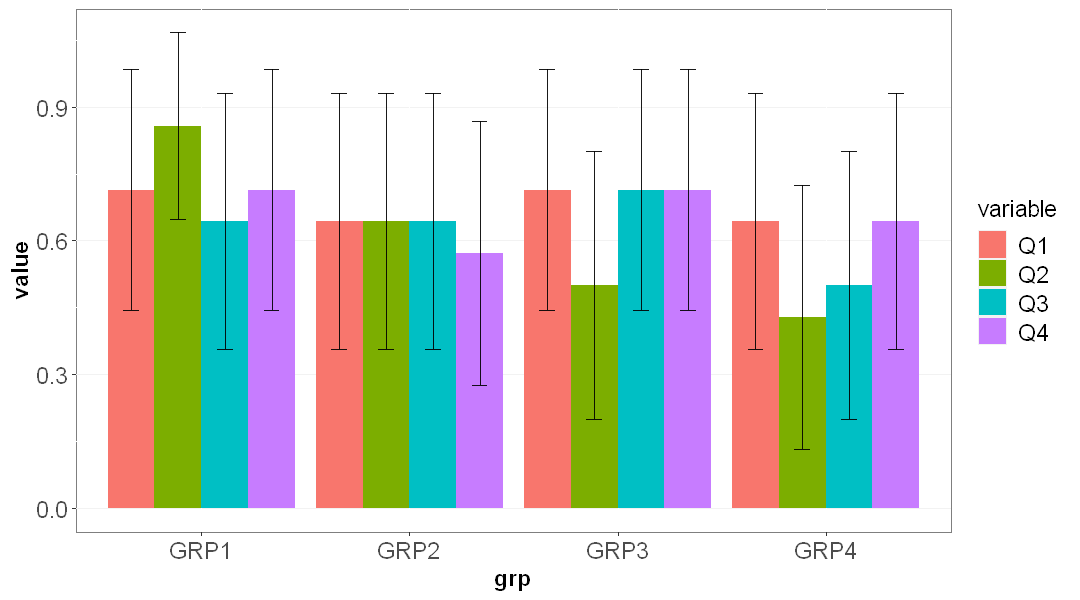

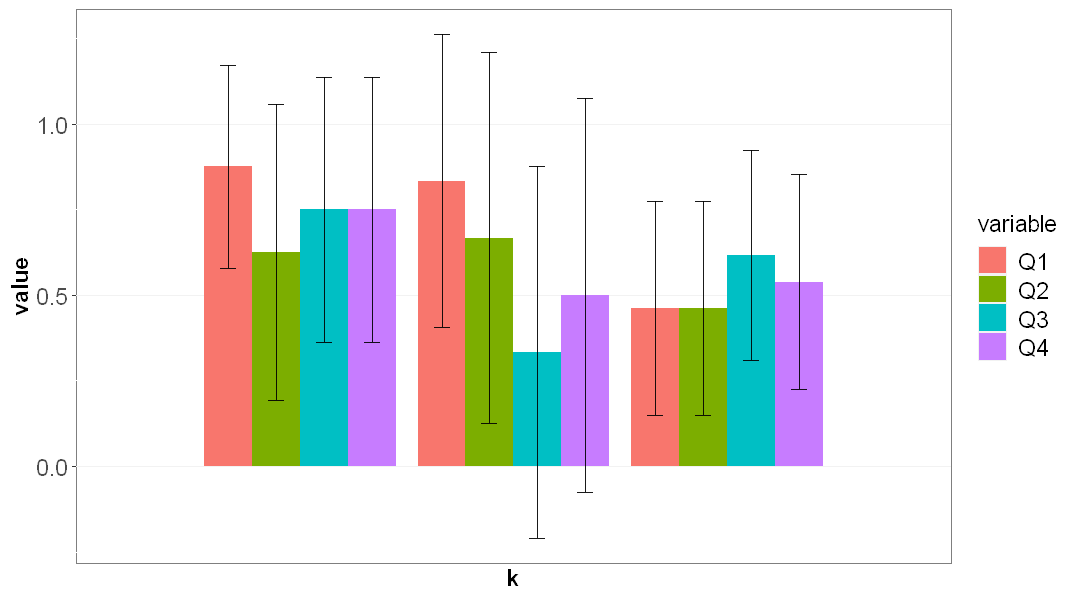

In [21]:
##############################################################
####                                                     #####
#### DESEMPENHO QUESTAO teoria_caracteristica_desejada   #####
####                                                     #####
##############################################################

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR GRUPO
desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado <- desempenho_teorico %>% select(grp,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt$n <- group_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
    scale_fill_discrete(labels = c("Q1", "Q2","Q3","Q4")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("GRP1", "GRP2", "GRP3", "GRP4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado<-desempenho_teorico_e_jogo %>% select(k,form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8)]), id.vars = c(1))
resultado_melt$sd <- 0
#resultado_melt[1:4,4] <- resultado[,3]
#resultado_melt[5:8,4] <- resultado[,5]
#resultado_melt[9:12,4] <- resultado[,7]
#resultado_melt[13:16,4] <- resultado[,9]

resultado_melt[1:3,4] <- resultado[,3]
resultado_melt[4:6,4] <- resultado[,5]
resultado_melt[7:9,4] <- resultado[,7]
resultado_melt[10:12,4] <- resultado[,9]

resultado_melt$n <- k_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=k)) + 
    scale_fill_discrete(labels = c("Q1", "Q2","Q3","Q4")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

In [22]:
###########################################################
####                                                  #####
#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar   #####
####                                                  #####
###########################################################

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR GRUPO
desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))


grp,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3571429,0.4008919,0.4285714,0.4209487,0.2142857,0.4258153,0.1428571,0.3631365,0.3571429,0.4972452,0.2500000,0.4274252
2,0.3928571,0.4353854,0.4464286,0.4064217,0.4285714,0.4746311,0.1250000,0.2900597,0.2500000,0.4274252,0.1071429,0.2894671
3,0.3750000,0.3501373,0.4107143,0.3873870,0.5714286,0.5135526,0.2857143,0.4688072,0.3214286,0.4643914,0.2500000,0.4274252
4,0.4107143,0.2520520,0.3928571,0.2723524,0.5357143,0.4986245,0.5000000,0.5188745,0.4285714,0.5135526,0.4464286,0.5017141


k,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3750000,0.3273268,0.4062500,0.3256175,0.2500000,0.4629100,0.3750000,0.5175492,0.3750000,0.5175492,0.3750000,0.5175492
2,0.4583333,0.3322900,0.4166667,0.3415650,0.5000000,0.5477226,0.1666667,0.4082483,0.3333333,0.5163978,0.2083333,0.4005205
3,0.4038462,0.4023170,0.4423077,0.3839738,0.6538462,0.4274252,0.2884615,0.4311582,0.3076923,0.4803845,0.2692308,0.4385290


grp,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3571429,0.4008919,0.4285714,0.4209487,0.2142857,0.4258153,0.1428571,0.3631365,0.3571429,0.4972452,0.2500000,0.4274252
2,0.3928571,0.4353854,0.4464286,0.4064217,0.4285714,0.4746311,0.1250000,0.2900597,0.2500000,0.4274252,0.1071429,0.2894671
3,0.3750000,0.3501373,0.4107143,0.3873870,0.5714286,0.5135526,0.2857143,0.4688072,0.3214286,0.4643914,0.2500000,0.4274252
4,0.4107143,0.2520520,0.3928571,0.2723524,0.5357143,0.4986245,0.5000000,0.5188745,0.4285714,0.5135526,0.4464286,0.5017141


grp,variable,value,sd,n
1,mean.form_desempenho_cadeia_alimentar_besouro,0.3571429,0.4008919,14
2,mean.form_desempenho_cadeia_alimentar_besouro,0.3928571,0.4353854,14
3,mean.form_desempenho_cadeia_alimentar_besouro,0.3750000,0.3501373,14
4,mean.form_desempenho_cadeia_alimentar_besouro,0.4107143,0.2520520,14
1,mean.form_desempenho_cadeia_alimentar_joaninha,0.4285714,0.4209487,14
2,mean.form_desempenho_cadeia_alimentar_joaninha,0.4464286,0.4064217,14
3,mean.form_desempenho_cadeia_alimentar_joaninha,0.4107143,0.3873870,14
4,mean.form_desempenho_cadeia_alimentar_joaninha,0.3928571,0.2723524,14
1,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.2142857,0.4258153,14
2,mean.form_desempenho_cadeia_alimentar_cigarrinha,0.4285714,0.4746311,14


k,mean.form_desempenho_cadeia_alimentar_besouro,sd.form_desempenho_cadeia_alimentar_besouro,mean.form_desempenho_cadeia_alimentar_joaninha,sd.form_desempenho_cadeia_alimentar_joaninha,mean.form_desempenho_cadeia_alimentar_cigarrinha,sd.form_desempenho_cadeia_alimentar_cigarrinha,mean.form_desempenho_cadeia_alimentar_pulgao,sd.form_desempenho_cadeia_alimentar_pulgao,mean.form_desempenho_cadeia_alimentar_grilo,sd.form_desempenho_cadeia_alimentar_grilo,mean.form_desempenho_cadeia_alimentar_lagarta,sd.form_desempenho_cadeia_alimentar_lagarta
1,0.3750000,0.3273268,0.4062500,0.3256175,0.2500000,0.4629100,0.3750000,0.5175492,0.3750000,0.5175492,0.3750000,0.5175492
2,0.4583333,0.3322900,0.4166667,0.3415650,0.5000000,0.5477226,0.1666667,0.4082483,0.3333333,0.5163978,0.2083333,0.4005205
3,0.4038462,0.4023170,0.4423077,0.3839738,0.6538462,0.4274252,0.2884615,0.4311582,0.3076923,0.4803845,0.2692308,0.4385290


ERROR: Error in `[<-.data.frame`(`*tmp*`, 1:4, 4, value = structure(list(sd.form_desempenho_cadeia_alimentar_besouro = c(0.327326835353989, : replacement element 1 has 3 rows, need 4


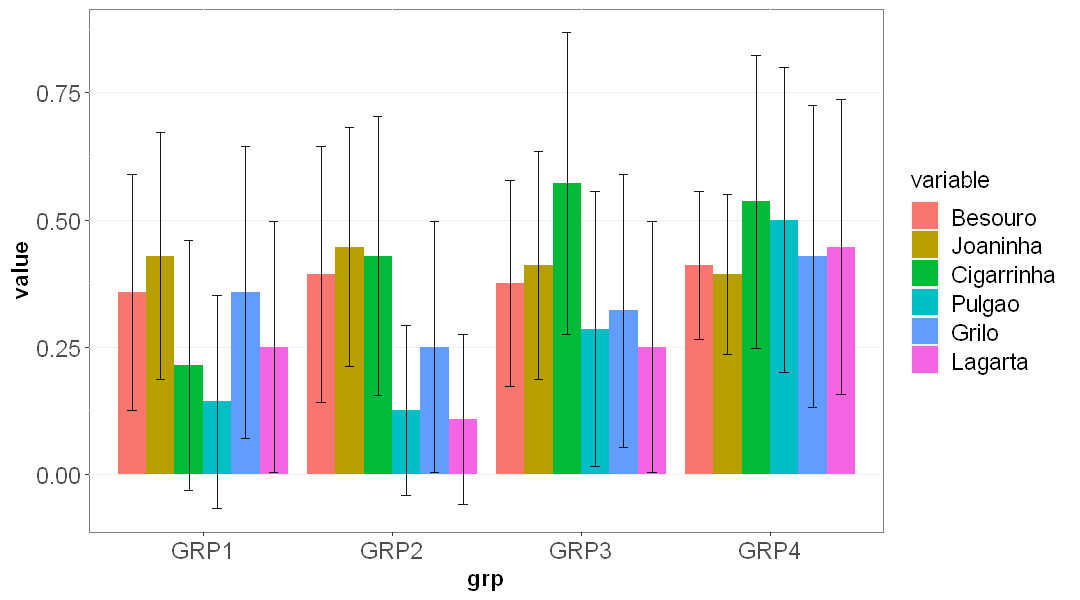

In [23]:
###########################################################
####                                                  #####
#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar   #####
####                                                  #####
###########################################################

#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR GRUPO
desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado <- desempenho_teorico %>% select(grp,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8,10,12)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt[17:20,4] <- resultado[,11]
resultado_melt[21:24,4] <- resultado[,13]                                             
resultado_melt$n <- group_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=grp)) + 
    scale_fill_discrete(labels = c("Besouro", "Joaninha","Cigarrinha","Pulgao","Grilo","Lagarta")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("GRP1", "GRP2", "GRP3", "GRP4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

#### DESEMPENHO QUESTAO teoria_caracteristica_desejada POR CLASSIFICAÇÃO
desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado<-desempenho_teorico_e_jogo %>% select(k,form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))
resultado_melt<-melt(as.data.frame(resultado[,c(1,2,4,6,8,10,12)]), id.vars = c(1))
resultado_melt$sd <- 0
resultado_melt[1:4,4] <- resultado[,3]
resultado_melt[5:8,4] <- resultado[,5]
resultado_melt[9:12,4] <- resultado[,7]
resultado_melt[13:16,4] <- resultado[,9]
resultado_melt[17:20,4] <- resultado[,11]
resultado_melt[21:24,4] <- resultado[,13]  
resultado_melt$n <- k_data$n
resultado_melt

ggplot(resultado_melt, aes(fill=variable, y=value, x=k)) + 
    scale_fill_discrete(labels = c("Besouro", "Joaninha","Cigarrinha","Pulgao","Grilo","Lagarta")) +
    geom_bar(position="dodge", stat="identity") +
    scale_x_discrete(labels = c("K1", "K2", "K3", "K4")) +
    labs(color = "Question") +
    theme(panel.background = element_rect(fill = "white", colour = "grey50"),
          panel.grid.major.y = element_line(colour = "#f2f2f2"),
          axis.text=element_text(size=14),
          axis.title=element_text(size=14,face="bold"),
          legend.title = element_text(size=14),
          legend.text = element_text(size=14)) +
    geom_errorbar( aes(ymin=value-(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n)), ymax=value+(qt((1-alpha)/2 + .5, n-1)*sd/sqrt(n))), width=0.3, position=position_dodge(.9), colour="black", alpha=0.9, size=0.5)
 

In [ ]:
######################################################
#####
##### Análise da pontuação geral
#####
######################################################


#### SOMA PONTUACAO desempenho_cadeia_alimentar POR GRUPO
pontuacao_total <- desempenho_teorico  %>% mutate(cadeia_alimentar_total = select(., form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total  %>% mutate(caracteristica_desejada_total = select(., form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total[,c("grp","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos","cadeia_alimentar_total","caracteristica_desejada_total")]
pontuacao_total <- pontuacao_total  %>% mutate(total = select(., form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total) %>% rowSums(na.rm = TRUE))
#pontuacao_total
pontuacao_total <- pontuacao_total  %>% mutate(
  total_normalizado = form_teoria_especies_p_manejo+form_teoria_cbXagrotóxicos+(cadeia_alimentar_total/6)+(caracteristica_desejada_total/4),
  media_normalizada = total_normalizado/4
 )
pontuacao_total
pontuacao_total %>% group_by(grp) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))



#### DESEMPENHO QUESTAO desempenho_cadeia_alimentar POR CLASSIFICAÇÃO
pontuacao_total <- desempenho_teorico_e_jogo  %>% mutate(cadeia_alimentar_total = select(., form_desempenho_cadeia_alimentar_besouro,form_desempenho_cadeia_alimentar_joaninha,form_desempenho_cadeia_alimentar_cigarrinha,form_desempenho_cadeia_alimentar_pulgao,form_desempenho_cadeia_alimentar_grilo,form_desempenho_cadeia_alimentar_lagarta) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total  %>% mutate(caracteristica_desejada_total = select(., form_teoria_caracteristica_desejada_q1,form_teoria_caracteristica_desejada_q2,form_teoria_caracteristica_desejada_q3,form_teoria_caracteristica_desejada_q4) %>% rowSums(na.rm = TRUE))
pontuacao_total <- pontuacao_total[,c("k","form_teoria_especies_p_manejo","form_teoria_cbXagrotóxicos","cadeia_alimentar_total","caracteristica_desejada_total")]
pontuacao_total <- pontuacao_total  %>% mutate(total = select(., form_teoria_especies_p_manejo,form_teoria_cbXagrotóxicos,cadeia_alimentar_total,caracteristica_desejada_total) %>% rowSums(na.rm = TRUE))
#pontuacao_total
pontuacao_total <- pontuacao_total  %>% mutate(
  total_normalizado = form_teoria_especies_p_manejo+form_teoria_cbXagrotóxicos+(cadeia_alimentar_total/6)+(caracteristica_desejada_total/4),
  media_normalizada = total_normalizado/4
 )
pontuacao_total
pontuacao_total %>% group_by(k) %>% summarise(across(everything(), list(mean = mean, sd = sd), .names = "{.fn}.{.col}"))

